In [2]:
!pip install librosa

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a sample audio for cat and dog
cat_sample, sr_cat = librosa.load('dataset/train/cat/cat_1.wav')
dog_sample, sr_dog = librosa.load('dataset/train/dog/dog_barking_1.wav')

# Playing a small segment of the audio (for demonstration purposes)
import IPython.display as ipd
ipd.Audio(cat_sample, rate=sr_cat)


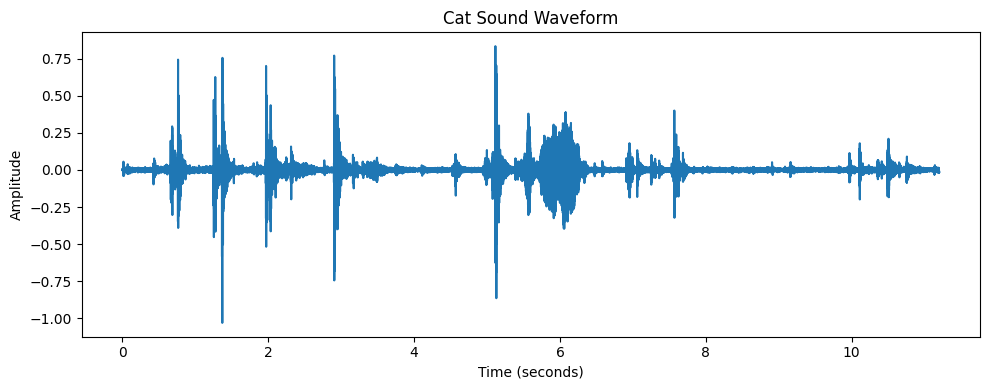

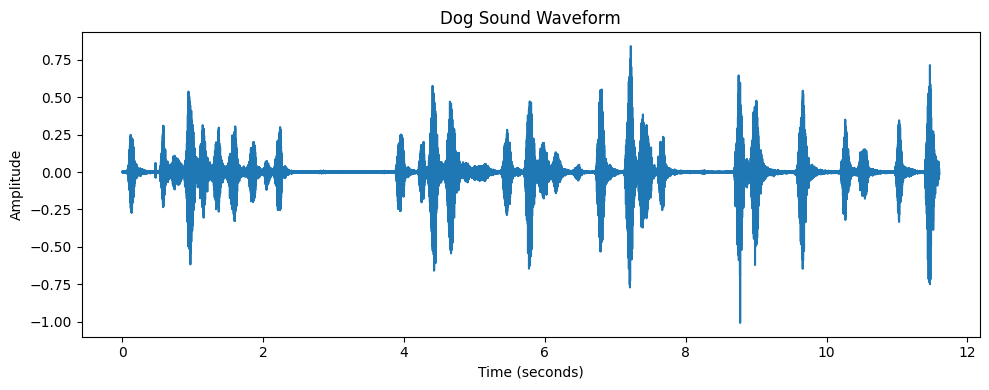

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(signal, sr, title="Waveform", xlabel="Time (seconds)", ylabel="Amplitude"):
    plt.figure(figsize=(10, 4))
    times = np.linspace(0, len(signal) / sr, num=len(signal))
    plt.plot(times, signal)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Plotting waveform for cat and dog samples again
plot_waveform(cat_sample, sr_cat, title="Cat Sound Waveform")
plot_waveform(dog_sample, sr_dog, title="Dog Sound Waveform")

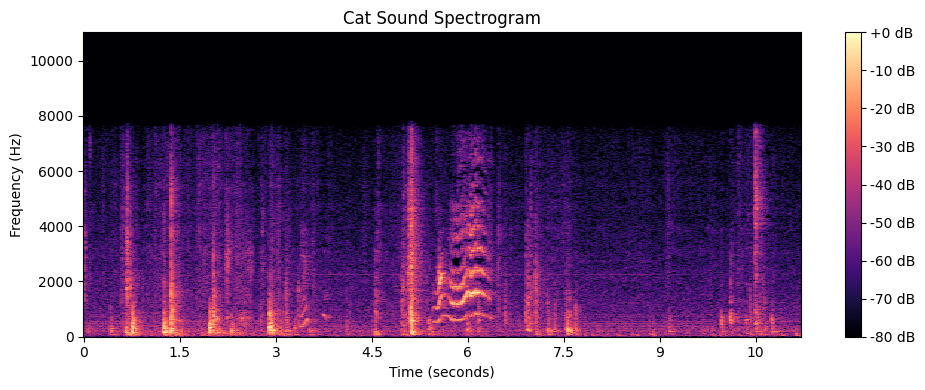

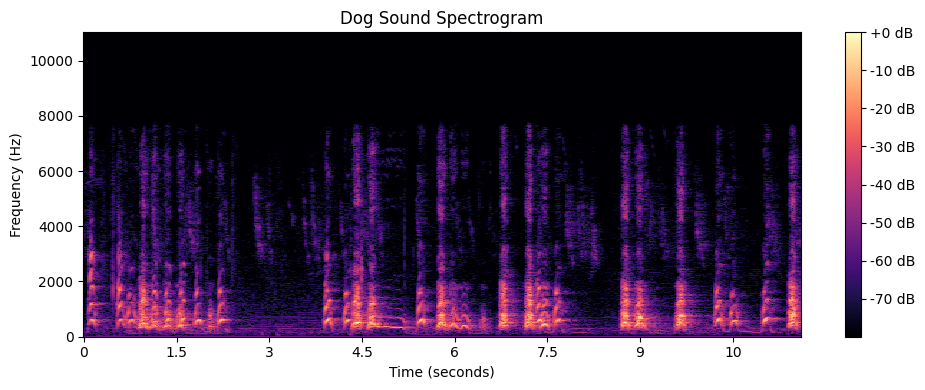

In [9]:
def plot_spectrogram(signal, sr, title="Spectrogram", xlabel="Time (seconds)", ylabel="Frequency (Hz)"):
    """Plot the spectrogram of a given audio signal."""
    plt.figure(figsize=(10, 4))

    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Plotting spectrogram for cat and dog samples
plot_spectrogram(cat_sample, sr_cat, title="Cat Sound Spectrogram")
plot_spectrogram(dog_sample, sr_dog, title="Dog Sound Spectrogram")

In [49]:
import wave

# List of provided audio files for cats and dogs
cat_files = [
    'dataset/train/cat/cat_1.wav',
    'dataset/train/cat/cat_3.wav',
    'dataset/train/cat/cat_4.wav',
    'dataset/train/cat/cat_5.wav',
    'dataset/train/cat/cat_8.wav',
    'dataset/train/cat/cat_10.wav',
    'dataset/train/cat/cat_11.wav',
    'dataset/train/cat/cat_12.wav',
    'dataset/train/cat/cat_13.wav',
    'dataset/train/cat/cat_15.wav',
    'dataset/train/cat/cat_16.wav',
    'dataset/train/cat/cat_18.wav',
    'dataset/train/cat/cat_7.wav',
    'dataset/train/cat/cat_9.wav',
]

dog_files = [
    'dataset/train/dog/dog_barking_1.wav',
    'dataset/train/dog/dog_barking_2.wav',
    'dataset/train/dog/dog_barking_4.wav',
    'dataset/train/dog/dog_barking_5.wav',
    'dataset/train/dog/dog_barking_6.wav',
    'dataset/train/dog/dog_barking_10.wav',
    'dataset/train/dog/dog_barking_11.wav',
    'dataset/train/dog/dog_barking_13.wav',
    'dataset/train/dog/dog_barking_14.wav',
    'dataset/train/dog/dog_barking_16.wav',
    'dataset/train/dog/dog_barking_17.wav',
    'dataset/train/dog/dog_barking_18.wav',
    'dataset/train/dog/dog_barking_20.wav',
    'dataset/train/dog/dog_barking_21.wav',
    'dataset/train/dog/dog_barking_22.wav',
]

def read_wav_file(filename):
    """Read a WAV file and return the signal and sampling rate."""
    with wave.open(filename, 'rb') as wf:
        n_channels = wf.getnchannels()
        n_frames = wf.getnframes()
        sampwidth = wf.getsampwidth()
        framerate = wf.getframerate()
        frames = wf.readframes(n_frames)

    # Convert audio bytes to numpy array
    if sampwidth == 1:
        dtype = np.int8
    elif sampwidth == 2:
        dtype = np.int16
    elif sampwidth == 3:
        dtype = np.int32  # Really 24 bits, but most convenient like this
    elif sampwidth == 4:
        dtype = np.int32

    audio_array = np.frombuffer(frames, dtype=dtype)

    # If stereo, take the mean to make it mono
    if n_channels == 2:
        audio_array = audio_array.reshape((-1, 2)).mean(axis=1)

    return audio_array, framerate

# Load all audio files and calculate their durations
cat_durations = [len(read_wav_file(f)[0]) / sr_cat for f in cat_files]
dog_durations = [len(read_wav_file(f)[0]) / sr_dog for f in dog_files]

cat_durations, dog_durations

([8.126984126984127,
  8.489795918367347,
  1.1668027210884353,
  8.70748299319728,
  1.0797278911564625,
  6.812154195011338,
  8.70748299319728,
  8.126984126984127,
  7.981859410430839,
  2.139138321995465,
  5.085170068027211,
  0.9520181405895691,
  8.634920634920634,
  0.7111111111111111],
 [8.417233560090702,
  8.634920634920634,
  5.227165532879819,
  7.507936507936508,
  5.289206349206349,
  1.810204081632653,
  6.746167800453515,
  3.8258503401360544,
  3.5494331065759637,
  2.953061224489796,
  2.243628117913832,
  9.436780045351474,
  5.958820861678005,
  6.297732426303855,
  2.054512471655329])

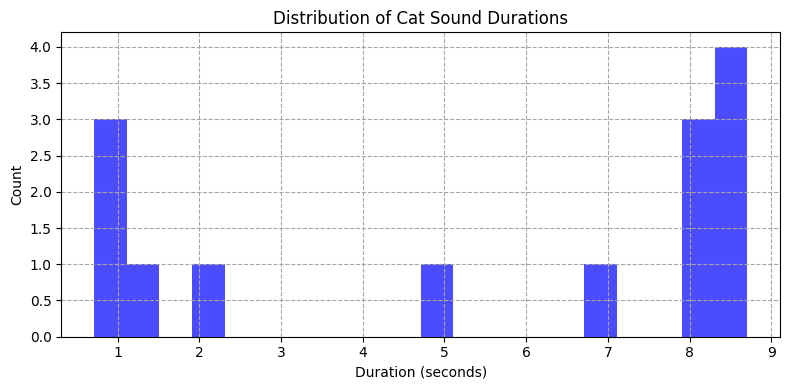

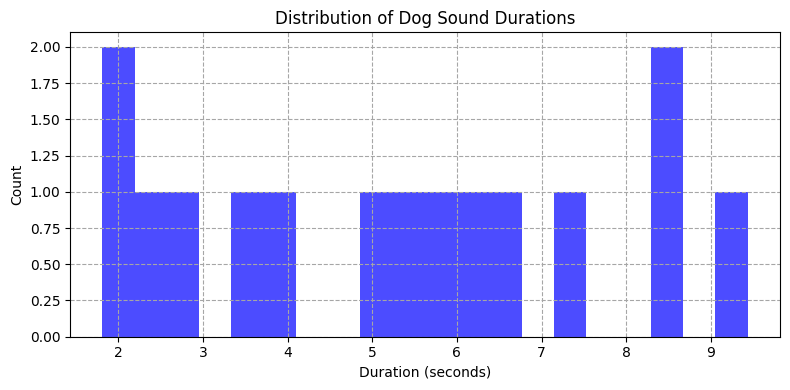

In [50]:
# Function to plot histograms for audio durations
def plot_duration_histogram(durations, title="Distribution of Audio Durations", xlabel="Duration (seconds)", ylabel="Count"):
    plt.figure(figsize=(8, 4))
    plt.hist(durations, bins=20, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which="both", ls="--", c='0.65')
    plt.tight_layout()
    plt.show()

# Plotting histograms for cat and dog audio durations
plot_duration_histogram(cat_durations, title="Distribution of Cat Sound Durations")
plot_duration_histogram(dog_durations, title="Distribution of Dog Sound Durations")

In [51]:
def normalize_audio(audio):
    """Normalize audio signal to range [-1, 1]"""
    audio = audio / np.max(np.abs(audio))
    return audio

# Normalize all cat and dog audio samples
cat_samples_normalized = [normalize_audio(read_wav_file(f)[0]) for f in cat_files]
dog_samples_normalized = [normalize_audio(read_wav_file(f)[0]) for f in dog_files]

# Check the min and max values after normalization for the first cat and dog sample
cat_min_max = (np.min(cat_samples_normalized[0]), np.max(cat_samples_normalized[0]))
dog_min_max = (np.min(dog_samples_normalized[0]), np.max(dog_samples_normalized[0]))

cat_min_max, dog_min_max

((-1.0, 0.8079178885630498), (-1.0, 0.8382209188660802))

In [52]:
def pad_or_truncate(audio, target_length):
    """Pad or truncate audio to a target length."""
    if len(audio) < target_length:
        padding = target_length - len(audio)
        audio = np.pad(audio, (0, padding), 'constant')
    else:
        audio = audio[:target_length]
    return audio

# Determine a consistent target length (for demonstration, we'll use the average length)
avg_length = int(np.mean([len(a) for a in cat_samples_normalized + dog_samples_normalized]))

# Pad or truncate all cat and dog audio samples
cat_samples_processed = [pad_or_truncate(a, avg_length) for a in cat_samples_normalized]
dog_samples_processed = [pad_or_truncate(a, avg_length) for a in dog_samples_normalized]

# Check the lengths after processing for the first cat and dog sample
cat_sample_length = len(cat_samples_processed[0])
dog_sample_length = len(dog_samples_processed[0])

cat_sample_length, dog_sample_length

(119126, 119126)

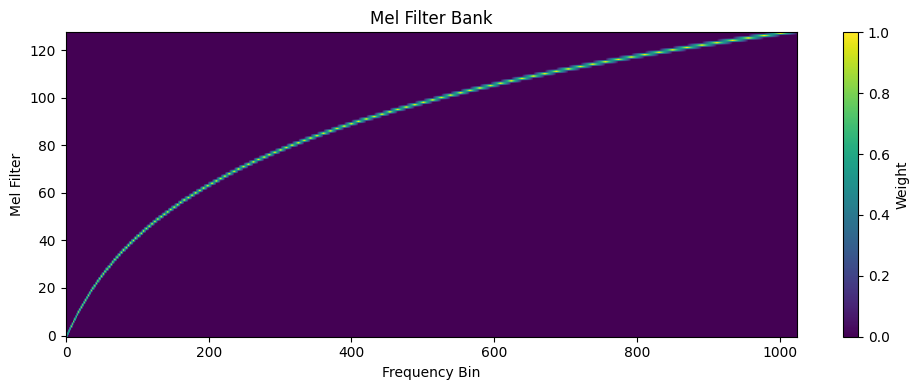

In [53]:
def mel_filter_bank(sr, n_fft, n_mels=128, fmin=0, fmax=None):
    """Compute the Mel filter bank without using librosa."""
    if fmax is None:
        fmax = sr / 2

    # Convert frequencies to Mel scale
    mel_min = 2595 * np.log10(1 + fmin / 700)
    mel_max = 2595 * np.log10(1 + fmax / 700)
    mels = np.linspace(mel_min, mel_max, n_mels + 2)

    # Convert Mel frequencies back to Hertz
    hz_points = 700 * (10**(mels / 2595) - 1)

    # Convert Hertz frequencies to FFT bins
    bins = np.floor((n_fft + 1) * hz_points / sr).astype(int)

    # Construct the filter bank
    filter_bank = np.zeros((n_mels, int(np.floor(n_fft / 2 + 1))))
    for i in range(1, n_mels + 1):
        filter_bank[i - 1, bins[i - 1]: bins[i]] = (np.arange(bins[i - 1], bins[i]) - bins[i - 1]) / (bins[i] - bins[i - 1])
        filter_bank[i - 1, bins[i]: bins[i + 1]] = 1 - (np.arange(bins[i], bins[i + 1]) - bins[i]) / (bins[i + 1] - bins[i])

    return filter_bank

# Test the Mel filter bank function
mel_basis = mel_filter_bank(sr_cat, 2048)
plt.figure(figsize=(10, 4))
plt.imshow(mel_basis, aspect='auto', origin='lower')
plt.ylabel('Mel Filter')
plt.xlabel('Frequency Bin')
plt.colorbar(label='Weight')
plt.title('Mel Filter Bank')
plt.tight_layout()
plt.show()

In [54]:
from scipy.fftpack import dct
from librosa.core.spectrum import stft
def compute_mfcc_alternative(audio, sr, n_mfcc=13, n_fft=2048, hop_length=512, n_mels=128):
    """Compute MFCC for a given audio using an entirely alternative approach."""

    # Compute the mel spectrogram
    Sxx = stft(audio, hop_length=hop_length)
    mel_basis = mel_filter_bank(sr, n_fft, n_mels=n_mels)
    mel_S = np.dot(mel_basis, np.abs(Sxx))

    # Convert power to decibels
    log_mel_S = np.log10(mel_S + 1e-6)

    # Compute MFCCs using DCT
    mfcc = dct(log_mel_S, axis=0, type=2, norm='ortho')[:n_mfcc]

    return mfcc

# Extract MFCCs for all cat and dog audio samples using the modified method
cat_mfccs_alternative = [compute_mfcc_alternative(a, sr_cat) for a in cat_samples_processed]
dog_mfccs_alternative = [compute_mfcc_alternative(a, sr_dog) for a in dog_samples_processed]

# Check the shape of the MFCCs for the first cat and dog sample
cat_mfccs_alternative[0].shape, dog_mfccs_alternative[0].shape

((13, 233), (13, 233))

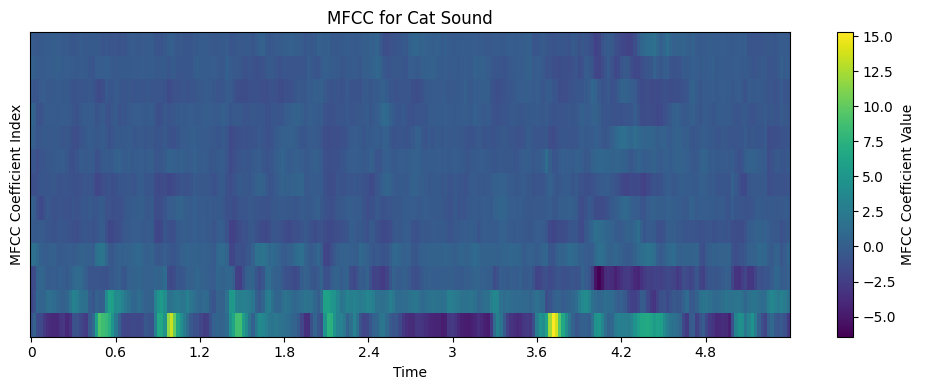

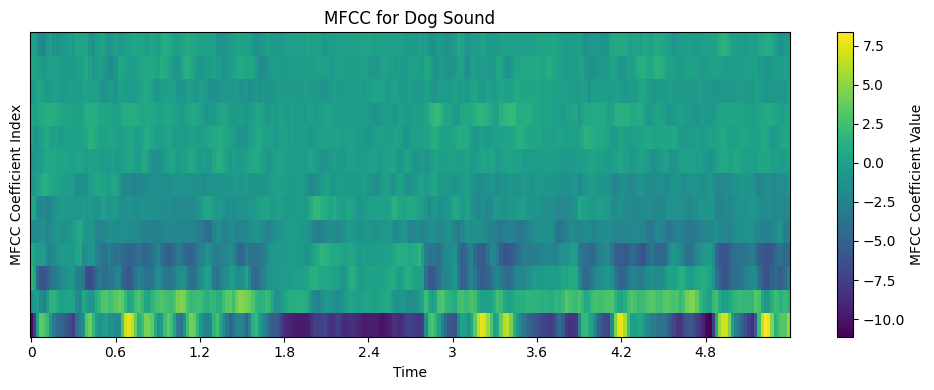

In [55]:
def plot_mfcc(mfcc, sr, hop_length=512, title="MFCC"):
    """Plot the MFCC for a given audio."""
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, x_axis='time', cmap='viridis')
    plt.colorbar(label='MFCC Coefficient Value')
    plt.ylabel('MFCC Coefficient Index')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Visualizing the MFCCs for the first cat and dog samples
plot_mfcc(cat_mfccs_alternative[0], sr_cat, title="MFCC for Cat Sound")
plot_mfcc(dog_mfccs_alternative[0], sr_dog, title="MFCC for Dog Sound")